In [82]:
library(ggplot2)
library(ggthemes)
library(lubridate)
library(dplyr)
library(tidyr)
library(DT)
library(scales)

In [83]:
df <- read.csv("csv/new_csv/cleaned_data.csv")
head(df)

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption_.l.100.km.,ecology_.gCO2.km.,gearbox,price,currency,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,daewoo rezzo,daewoo,2003,200000,89,121,Gasoline,9.0,236,Manual,199,EUR,Germany,0,NA,unknown,unknown,199
2,volkswagen golf,volkswagen,1994,222275,55,75,Gasoline,0.0,0,Manual,200,EUR,Germany,0,NA,unknown,unknown,200
3,ford fiesta,ford,2001,153000,44,60,Gasoline,7.3,171,Manual,290,EUR,Germany,0,NA,unknown,unknown,290
4,volkswagen polo,volkswagen,1999,154000,44,60,Gasoline,6.3,151,Manual,350,EUR,Germany,0,NA,unknown,unknown,350
5,nissan micra,nissan,1998,140000,40,54,Gasoline,6.0,152,Manual,380,EUR,Germany,0,NA,unknown,unknown,380
6,opel omega,opel,1995,186675,85,116,Gasoline,NA,NA,Manual,400,EUR,Germany,0,NA,unknown,unknown,400


In [84]:
names(df)[names(df) == 'ecology_.gCO2.km.'] <- 'ecology'
names(df)[names(df) == 'consumption_.l.100.km.'] <- 'consumption'
colnames(df)

[1] "name"            "mark"            "year"            "mileage"        
 [5] "engine_power_kW" "engine_power_hp" "fuel_type"       "consumption"    
 [9] "ecology"         "gearbox"         "price"           "currency"       
[13] "country"         "engine_size"     "nr_of_accidents" "color_exterior" 
[17] "color_interior"  "price_eur"

In [85]:
summary(df)

     name               mark                year         mileage      
 Length:1700        Length:1700        Min.   :   0   Min.   :     0  
 Class :character   Class :character   1st Qu.:2007   1st Qu.: 44676  
 Mode  :character   Mode  :character   Median :2013   Median : 91199  
                                       Mean   :1935   Mean   :117959  
                                       3rd Qu.:2018   3rd Qu.:178765  
                                       Max.   :2020   Max.   :700000  
                                                                      
 engine_power_kW  engine_power_hp  fuel_type          consumption    
 Min.   : 30.00   Min.   : 41.0   Length:1700        Min.   : 0.000  
 1st Qu.: 55.00   1st Qu.: 75.0   Class :character   1st Qu.: 5.700  
 Median : 74.00   Median :101.0   Mode  :character   Median : 6.400  
 Mean   : 78.85   Mean   :107.3                      Mean   : 6.659  
 3rd Qu.:100.00   3rd Qu.:136.0                      3rd Qu.: 7.500  
 Max.   :176

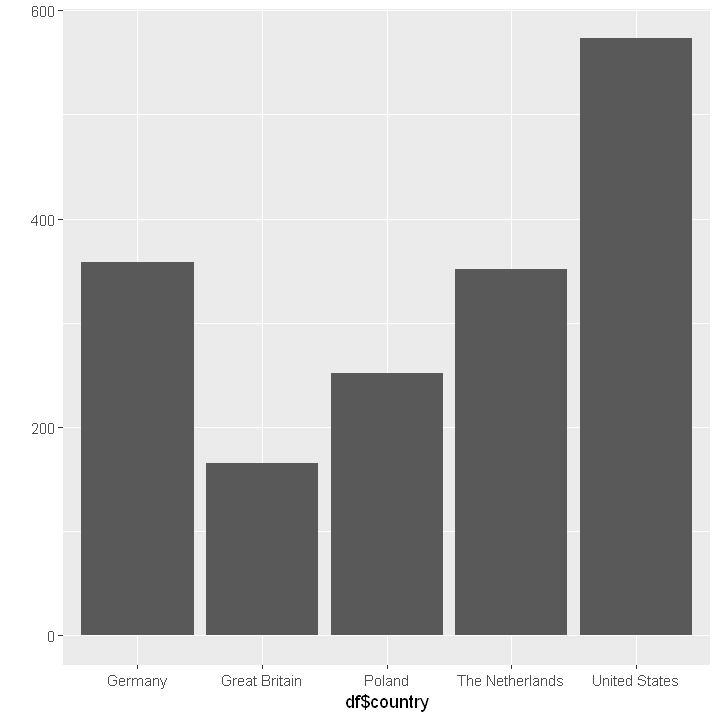

In [86]:
qplot(df$country)

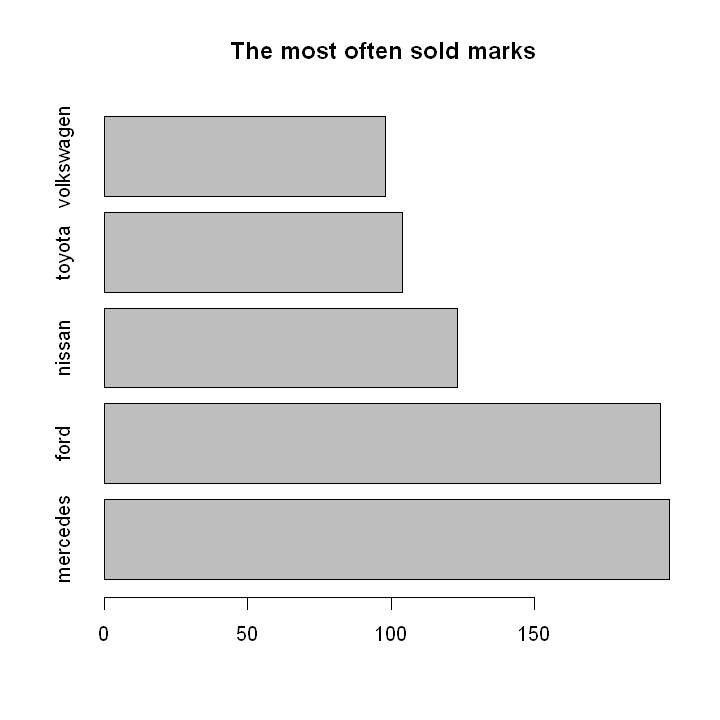

In [87]:
top_5 <- df %>%
    count(mark) %>%
    arrange(desc(n)) %>%
    slice(seq_len(5))
barplot(top_5$n, main="The most often sold marks", horiz=TRUE, names.arg=top_5$mark)
# top_5$mark

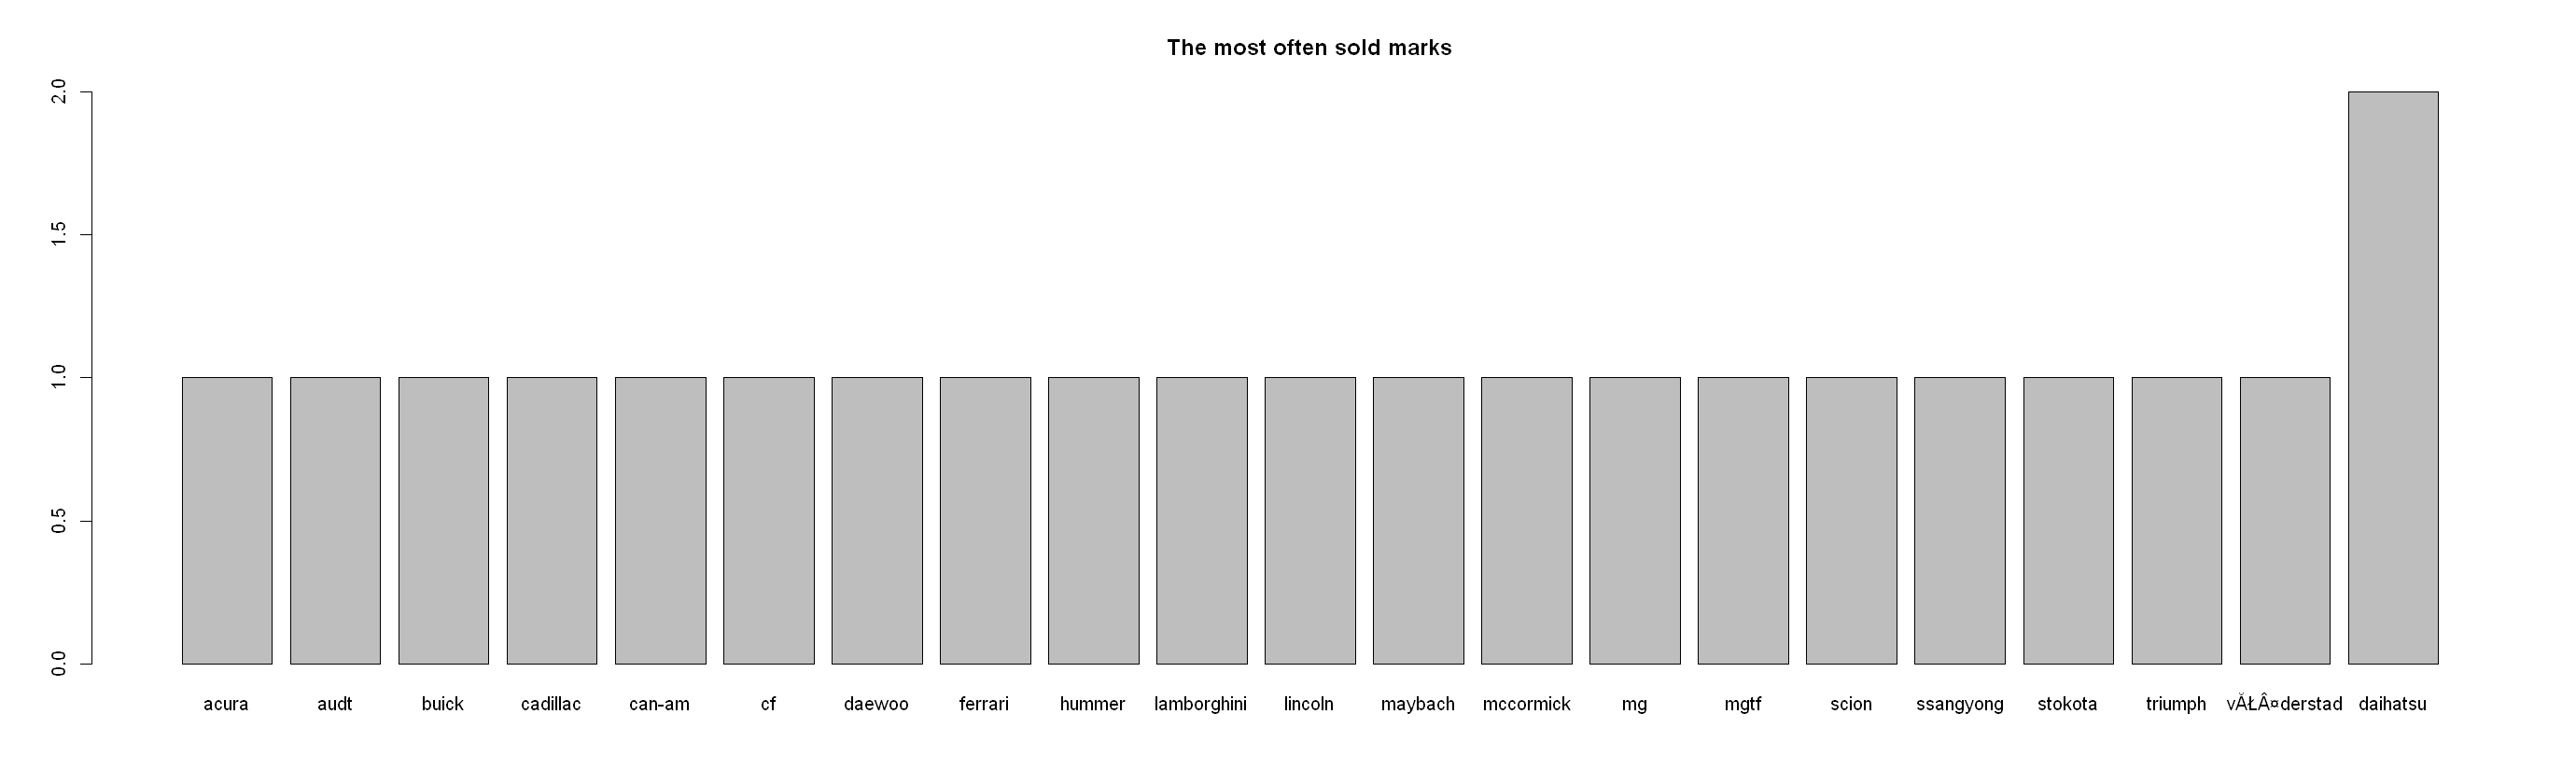

In [107]:
options(repr.plot.width=23, repr.plot.height=7)
tail_5 <- df %>%
    count(mark) %>%
    arrange(n) %>%
    slice(seq_len(21))
barplot(tail_5$n, main="The most often sold marks", names.arg=tail_5$mark)

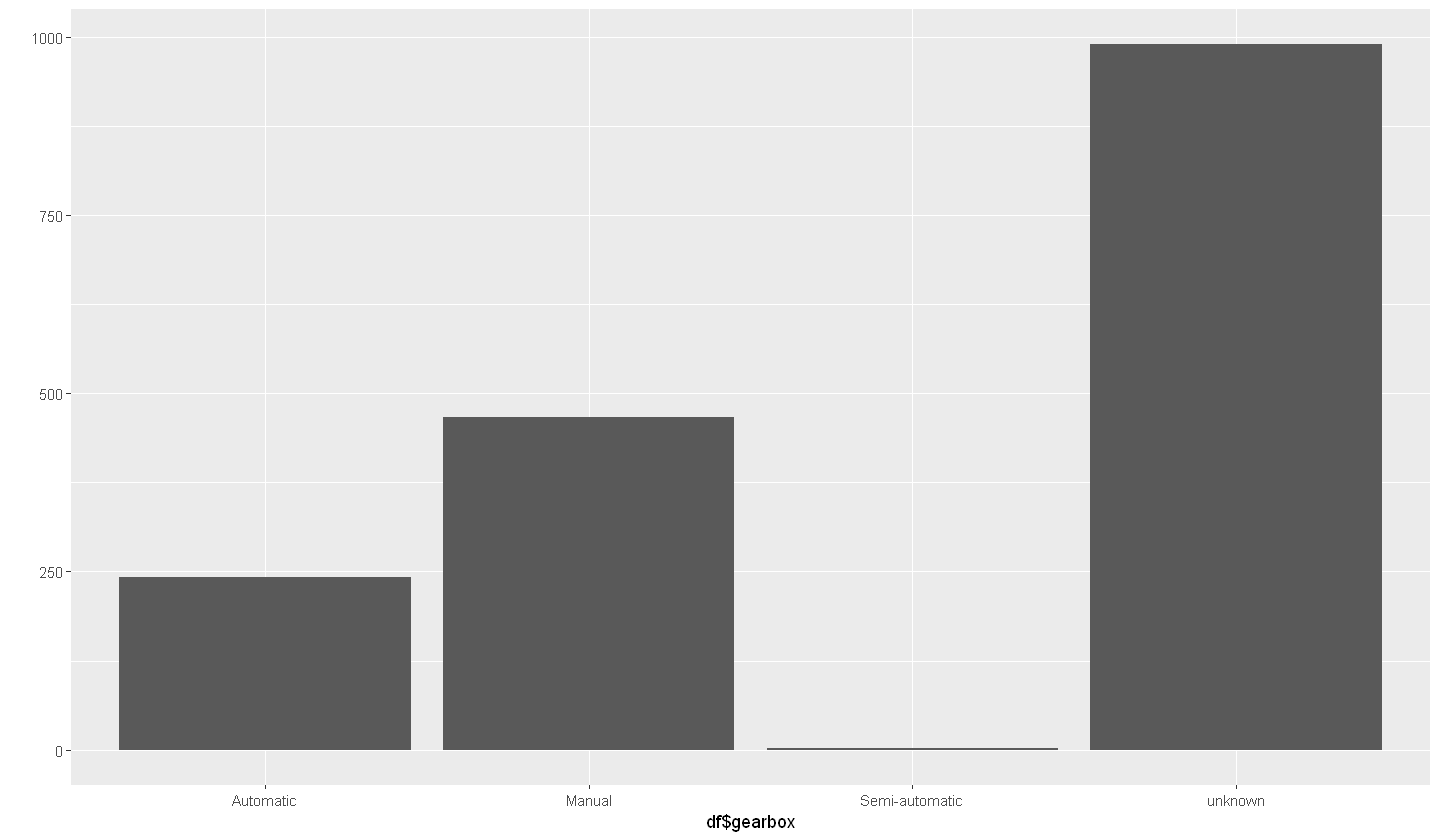

In [109]:
options(repr.plot.width=12, repr.plot.height=7)
qplot(df$gearbox)

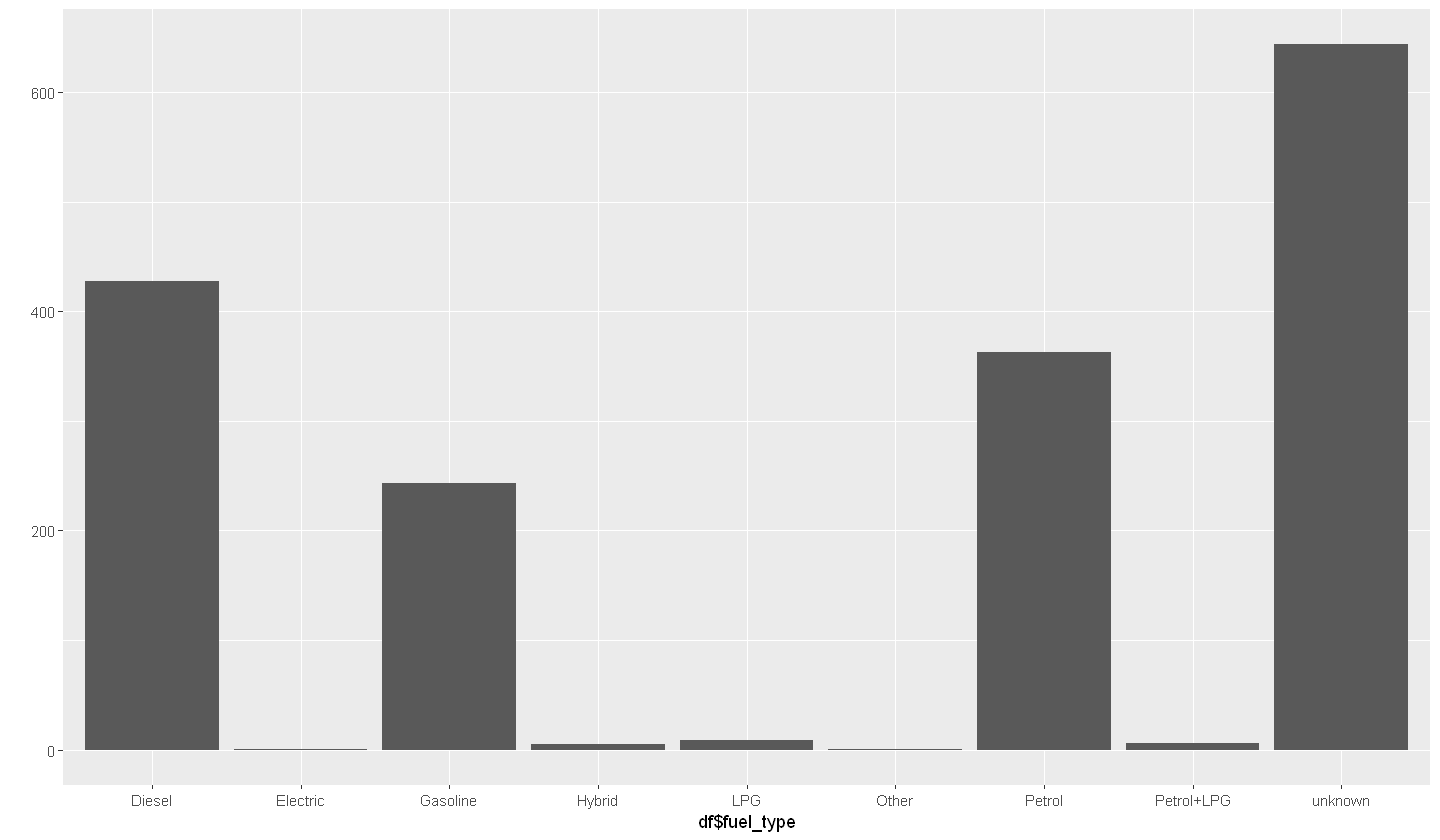

In [110]:
qplot(df$fuel_type)

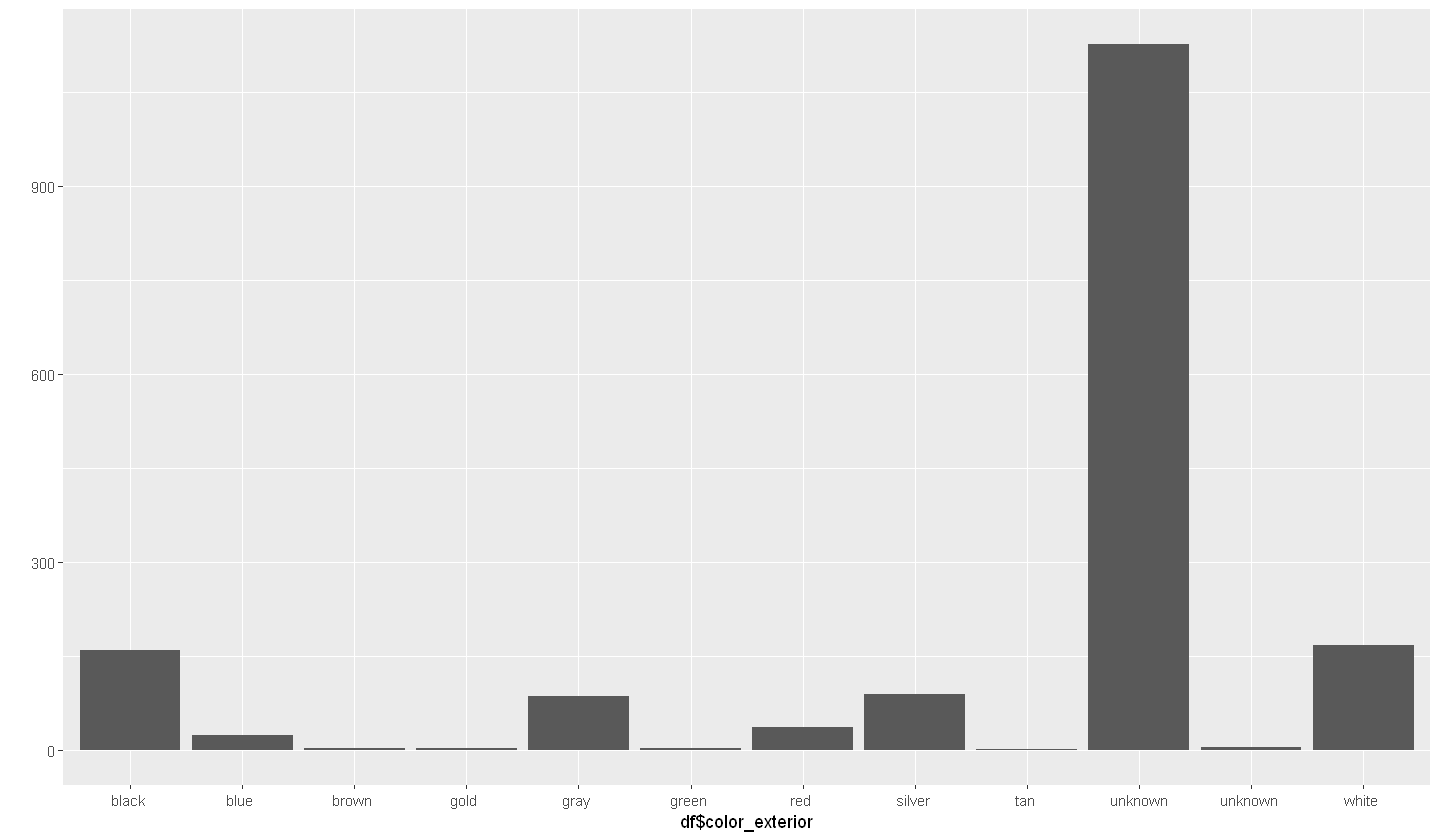

In [111]:
qplot(df$color_exterior)

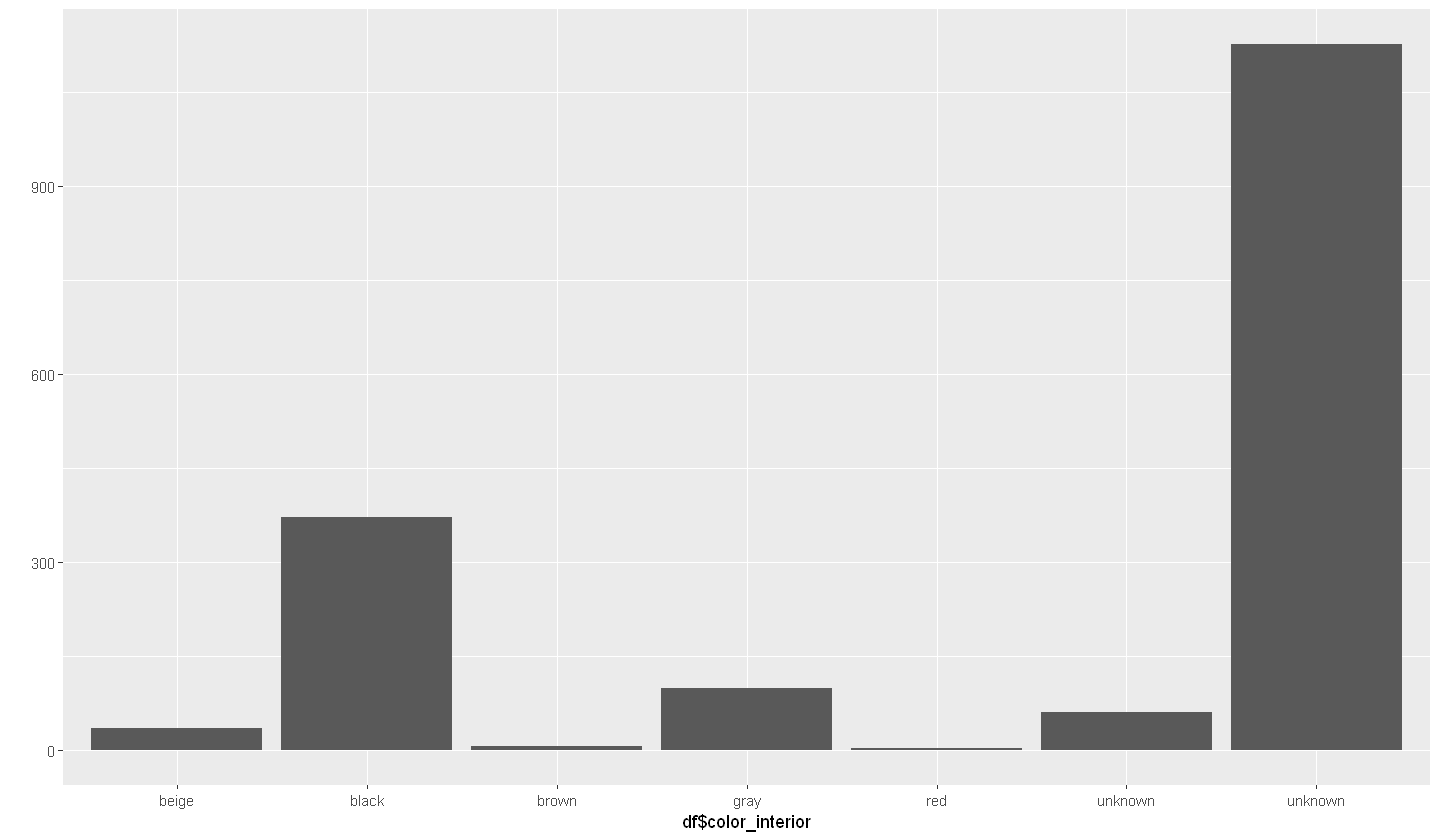

In [112]:
qplot(df$color_interior)

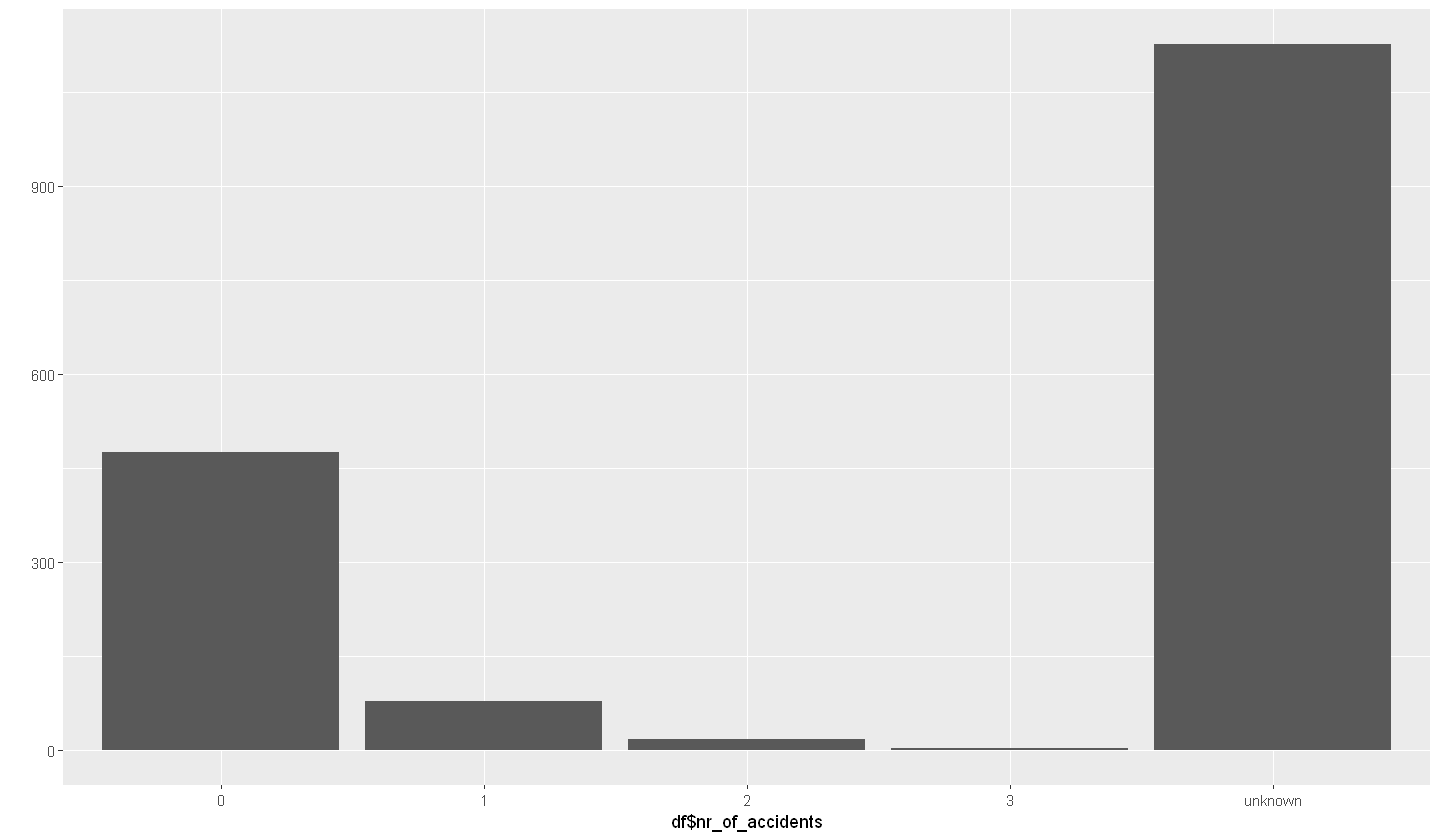

In [114]:
qplot(df$nr_of_accidents)

The following objects are masked from df (pos = 3):

    color_exterior, color_interior, consumption, country, currency,
    ecology, engine_power_hp, engine_power_kW, engine_size, fuel_type,
    gearbox, mark, mileage, name, nr_of_accidents, price, price_eur,
    year


The following objects are masked from df (pos = 4):

    color_exterior, color_interior, consumption, country, currency,
    ecology, engine_power_hp, engine_power_kW, engine_size, fuel_type,
    gearbox, mark, mileage, name, nr_of_accidents, price, price_eur,
    year


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in xy.coords(x, y, xlabel, ylabel, log):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in xy.coords(x, y, xlabel, ylabel, log):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message in xy.coords(x, y, xlabel, ylabel, log):
"pojawiły się wartości NA na skutek przekształcenia"
Warning message 

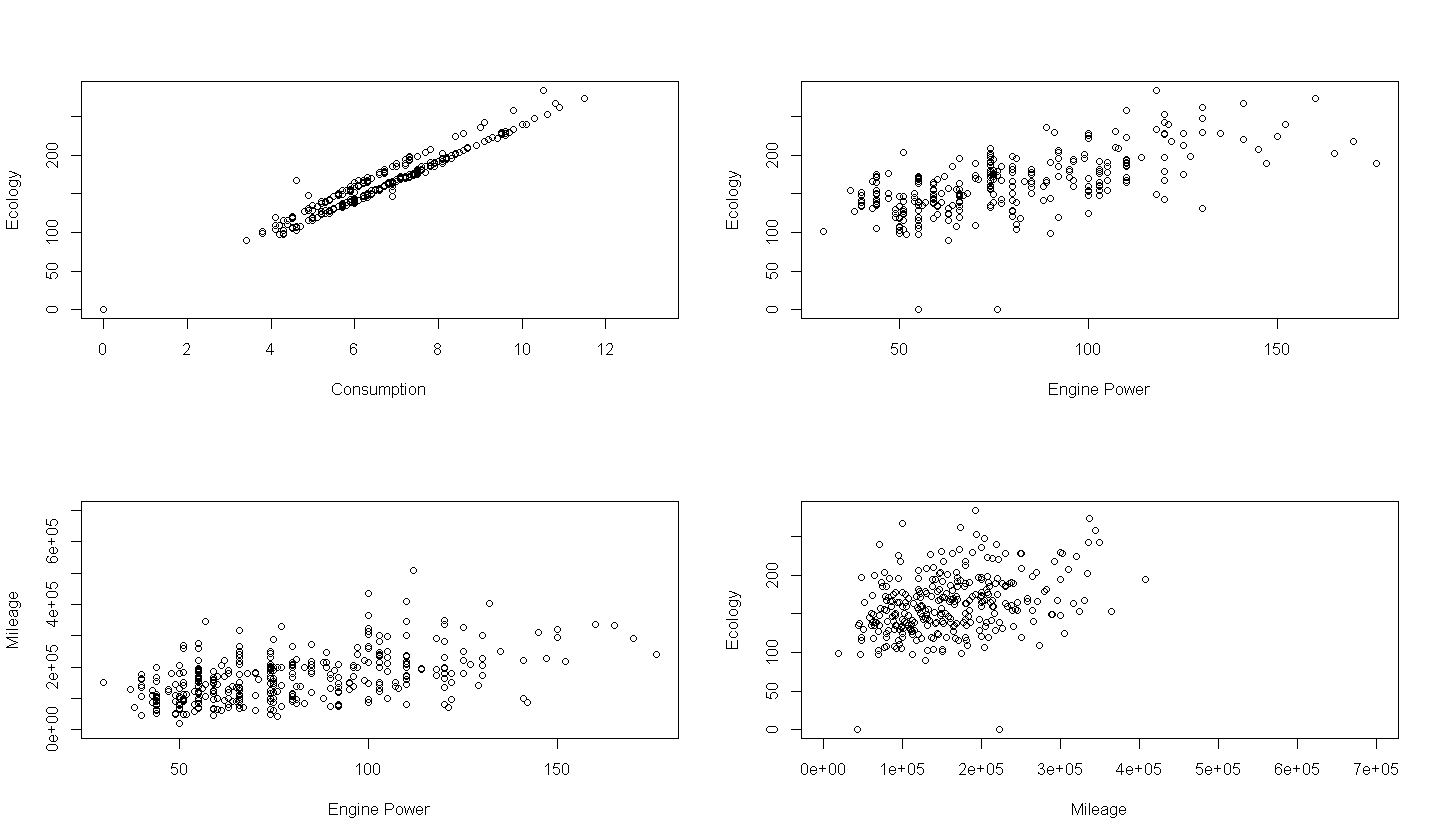

In [115]:
attach(df)
par(mfrow=c(2,2))
plot(x=consumption, y=ecology, xlab="Consumption", ylab="Ecology")
plot(x=engine_power_kW, y=ecology, xlab="Engine Power", ylab="Ecology")
plot(x=engine_power_kW, y=mileage, xlab="Engine Power", ylab="Mileage")
plot(x=mileage, y=ecology, xlab="Mileage", ylab="Ecology")

`geom_smooth()` using formula 'y ~ x'



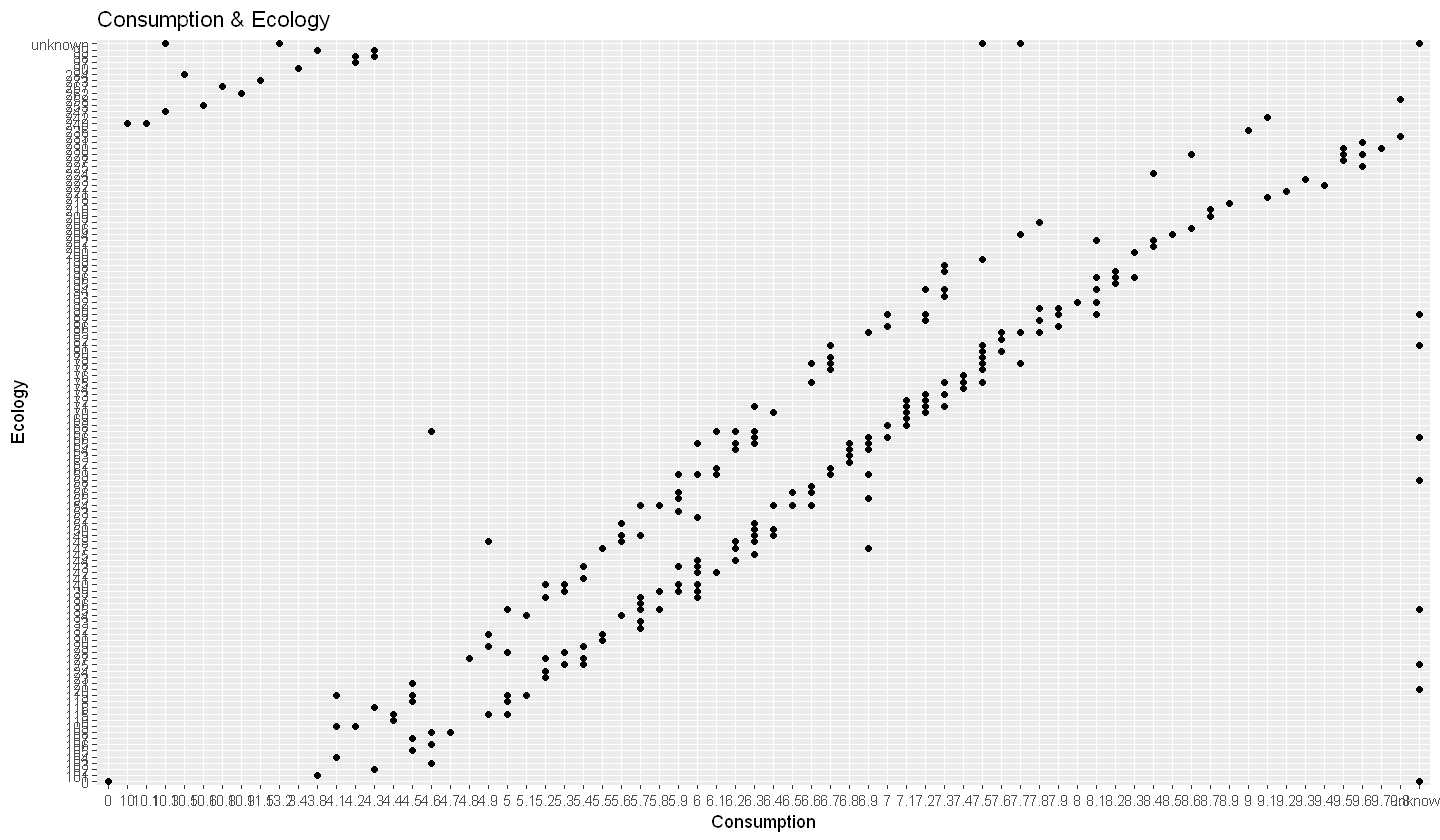

In [116]:
ggplot(data=df, aes(x=consumption, y=ecology)) +
  geom_point() +
  geom_smooth(method='lm') +
  xlab('Consumption') +
  ylab('Ecology') +
  ggtitle('Consumption & Ecology')

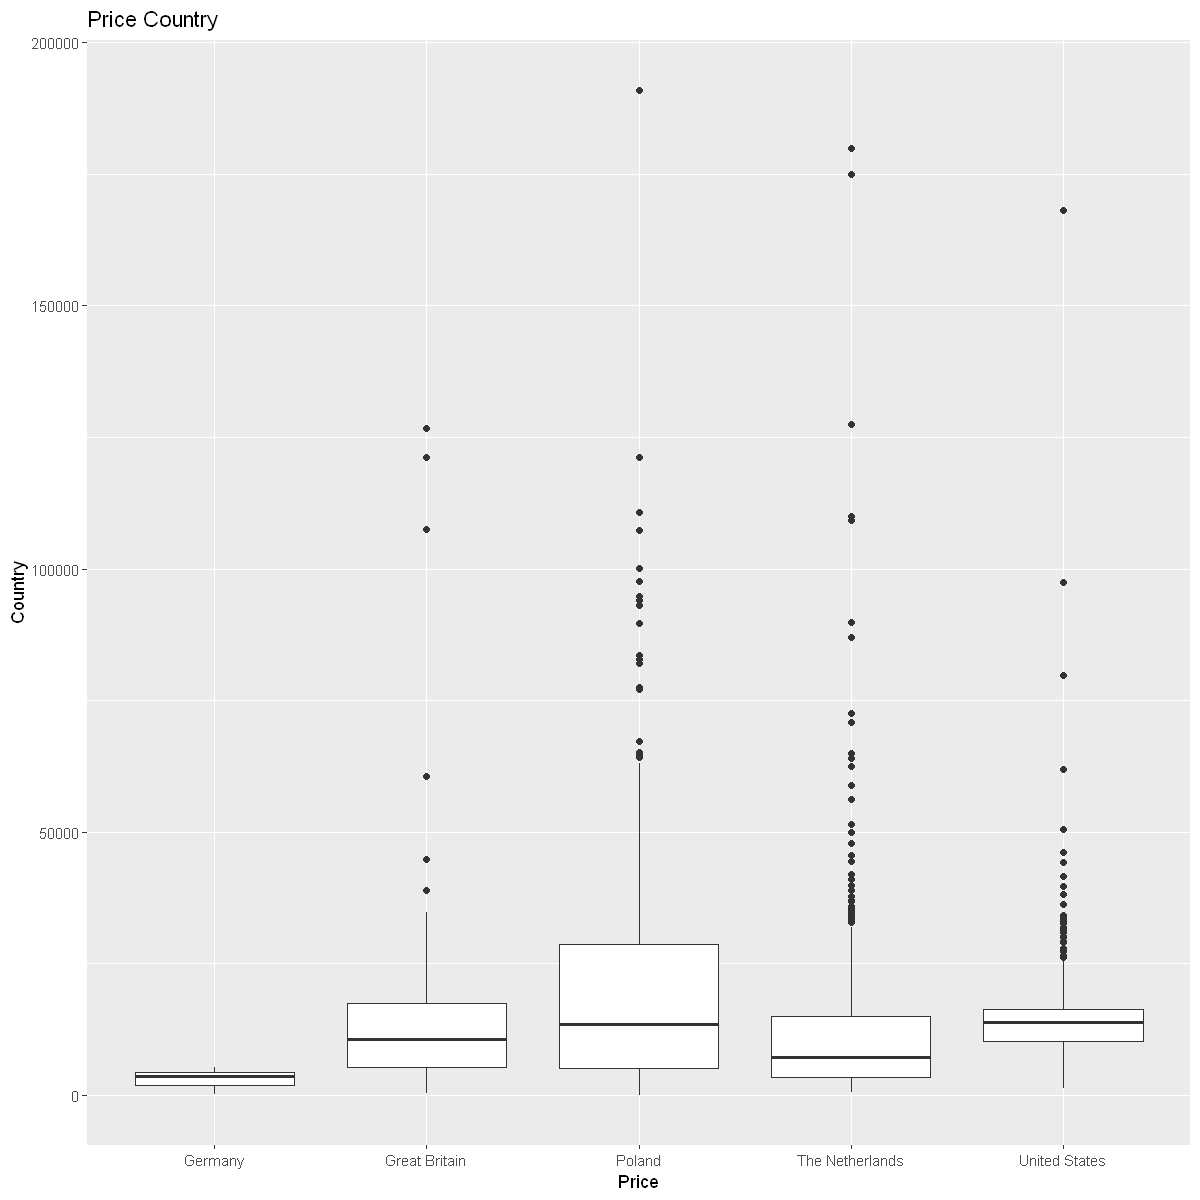

In [118]:
options(repr.plot.width=10, repr.plot.height=10)
df2 <- df[(df$price_eur < 2e+05),]
ggplot(data = df2, aes(y=price_eur, x=country)) +
  geom_boxplot() +
  xlab('Price') +
  ylab('Country') +
  ggtitle('Price Country')

In [119]:
# head(df)

In [120]:
# data$age <- as.character(data$age)
# data$age[which(data$age=="18-24")] <- "20"
# data$age[which(data$age=="35-44")] <- "40"
# data$age[which(data$age=="45-54")] <- "50"
# # data$age <- as.numeric(data$age)

In [127]:
head(df)

,name,mark,year,mileage,engine_power_kW,engine_power_hp,fuel_type,consumption,ecology,gearbox,price,currency,country,engine_size,nr_of_accidents,color_exterior,color_interior,price_eur
,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,daewoo rezzo,daewoo,2003,200000,89,121,Gasoline,9,236,Manual,199,EUR,Germany,0,unknown,unknown,unknown,199
2,volkswagen golf,volkswagen,1994,222275,55,75,Gasoline,0,0,Manual,200,EUR,Germany,0,unknown,unknown,unknown,200
3,ford fiesta,ford,2001,153000,44,60,Gasoline,7.3,171,Manual,290,EUR,Germany,0,unknown,unknown,unknown,290
4,volkswagen polo,volkswagen,1999,154000,44,60,Gasoline,6.3,151,Manual,350,EUR,Germany,0,unknown,unknown,unknown,350
5,nissan micra,nissan,1998,140000,40,54,Gasoline,6,152,Manual,380,EUR,Germany,0,unknown,unknown,unknown,380
6,opel omega,opel,1995,186675,85,116,Gasoline,unknown,unknown,Manual,400,EUR,Germany,0,unknown,unknown,unknown,400


In [134]:
cormat <- df[, c(3, 4, 5, 6, 8, 9, 14, 18)]
# cormat["unknown"] <- 0.0
cormat$ecology[which(cormat$ecology=="unknown")] <- 0.0
cormat$consumption[which(cormat$consumption=="unknown")] <- 0.0

head(cormat)

,year,mileage,engine_power_kW,engine_power_hp,consumption,ecology,engine_size,price_eur
,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,2003,200000,89,121,9,236,0,199
2,1994,222275,55,75,0,0,0,200
3,2001,153000,44,60,7.3,171,0,290
4,1999,154000,44,60,6.3,151,0,350
5,1998,140000,40,54,6,152,0,380
6,1995,186675,85,116,0,0,0,400


In [ ]:
cormat round(cor(cormat), 2)